In [54]:
        
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [55]:


num_records = 5000
users = [f'MSISDN_{i}' for i in range(1000)]
handset_manufacturers = ['Apple', 'Samsung', 'Huawei', 'Xiaomi', 'Oppo']
handset_models = {
    'Apple': ['iPhone 12', 'iPhone 13', 'iPhone 11', 'iPhone SE', 'iPhone X'],
    'Samsung': ['Galaxy S21', 'Galaxy A52', 'Galaxy S20', 'Galaxy A12', 'Galaxy Note 20'],
    'Huawei': ['P40 Pro', 'P30', 'Mate 40', 'Y9', 'Nova 7i'],
    'Xiaomi': ['Redmi Note 10', 'Mi 11', 'Redmi 9A', 'Poco X3', 'Mi 10T'],
    'Oppo': ['Reno 5', 'A15', 'Find X3', 'A53', 'Reno 6']
}

data = []
for i in range(num_records):
    manufacturer = np.random.choice(handset_manufacturers, p=[0.35, 0.30, 0.20, 0.1, 0.05])
    model = np.random.choice(handset_models[manufacturer])
    data.append({
        'MSISDN': np.random.choice(users),
        'Handset Manufacturer': manufacturer,
        'Handset Model': model,
        'Session Duration': np.random.uniform(10, 1000),
        'DL Data (Bytes)': np.random.uniform(1e6, 1e9),
        'UL Data (Bytes)': np.random.uniform(5e5, 5e8),
        'Social Media DL (Bytes)': np.random.uniform(1e5, 2e8),
        'Google DL (Bytes)': np.random.uniform(1e5, 1e8),
        'Email DL (Bytes)': np.random.uniform(5e4, 5e7),
        'Youtube DL (Bytes)': np.random.uniform(1e6, 3e8),
        'Netflix DL (Bytes)': np.random.uniform(1e6, 4e8),
        'Gaming DL (Bytes)': np.random.uniform(1e6, 5e8),
        'Other DL (Bytes)': np.random.uniform(1e5, 1e8),
        'TCP Retransmissions': np.random.uniform(0, 50),
        'RTT': np.random.uniform(20, 500),
        'Throughput': np.random.uniform(10, 200)
    })

df = pd.DataFrame(data)

# Add some missing values for demonstration
for col in ['TCP Retransmissions', 'RTT', 'Throughput']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

print("Sample DataFrame created with shape:", df.shape)
df.head()

Sample DataFrame created with shape: (5000, 16)


,MSISDN,Handset Manufacturer,Handset Model,Session Duration,DL Data (Bytes),UL Data (Bytes),Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),TCP Retransmissions,RTT,Throughput
0,MSISDN_288,Apple,iPhone 11,741.825959,3.416859e+08,4.338976e+08,5.222555e+07,2.028807e+07,1.971480e+07,2.659975e+08,6.493075e+07,3.517094e+08,4.345086e+07,37.060688,243.685821,77.120415
1,MSISDN_531,Samsung,Galaxy Note 20,201.405154,3.140595e+07,3.730745e+08,1.845459e+08,9.265105e+07,4.137237e+07,2.102319e+08,3.120492e+08,3.530328e+08,9.029295e+07,49.924137,126.907576,15.508366
2,MSISDN_709,Huawei,P30,436.497968,7.779267e+08,2.521562e+08,3.163983e+07,1.570806e+06,4.225110e+07,7.334355e+07,3.154524e+08,4.185557e+08,4.363872e+07,4.709256,474.600699,135.909105
3,MSISDN_571,Huawei,Y9,372.841985,8.175856e+08,2.461133e+08,1.224399e+08,6.424428e+07,1.220261e+07,1.428029e+08,1.498248e+08,3.611118e+08,1.305784e+05,10.599980,494.063745,146.933327
4,MSISDN_738,Samsung,Galaxy Note 20,704.301234,7.061800e+08,2.790865e+08,1.460982e+08,6.321039e+07,1.608492e+07,1.506560e+08,1.552896e+08,1.069000e+08,4.721463e+07,42.025566,166.888365,190.616664


In [56]:
# Task: Identify top 10 handsets, top 3 manufacturers, and top 5 handsets per manufacturer

print("--- Handset Analysis ---")

# Top 10 Handsets
top_10_handsets = df['Handset Model'].value_counts().nlargest(10)
print("\nTop 10 Handsets Used by Customers:\n", top_10_handsets)

# Top 3 Manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().nlargest(3)
print("\nTop 3 Handset Manufacturers:\n", top_3_manufacturers)

# Top 5 Handsets per Top 3 Manufacturer
print("\nTop 5 Handsets per Top Manufacturer:")
for manufacturer in top_3_manufacturers.index:
    print(f"\n--- {manufacturer} ---")
    top_handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Model'].value_counts().nlargest(5)
    print(top_handsets)

--- Handset Analysis ---

Top 10 Handsets Used by Customers:
 Handset Model
iPhone 11         379
iPhone X          378
iPhone SE         353
iPhone 12         353
iPhone 13         343
Galaxy Note 20    312
Galaxy S20        307
Galaxy A52        300
Galaxy A12        285
Galaxy S21        275
Name: count, dtype: int64

Top 3 Handset Manufacturers:
 Handset Manufacturer
Apple      1806
Samsung    1479
Huawei      966
Name: count, dtype: int64

Top 5 Handsets per Top Manufacturer:

--- Apple ---
Handset Model
iPhone 11    379
iPhone X     378
iPhone 12    353
iPhone SE    353
iPhone 13    343
Name: count, dtype: int64

--- Samsung ---
Handset Model
Galaxy Note 20    312
Galaxy S20        307
Galaxy A52        300
Galaxy A12        285
Galaxy S21        275
Name: count, dtype: int64

--- Huawei ---
Handset Model
Mate 40    219
P30        195
Y9         194
P40 Pro    187
Nova 7i    171
Name: count, dtype: int64


In [57]:
# Create new columns for total data and for each application
df['Total Data (Bytes)'] = df['DL Data (Bytes)'] + df['UL Data (Bytes)']
df['Social Media Data'] = df['Social Media DL (Bytes)']
df['Google Data'] = df['Google DL (Bytes)']
df['Email Data'] = df['Email DL (Bytes)']
df['Youtube Data'] = df['Youtube DL (Bytes)']
df['Netflix Data'] = df['Netflix DL (Bytes)']
df['Gaming Data'] = df['Gaming DL (Bytes)']
df['Other Data'] = df['Other DL (Bytes)']

print("New data columns created successfully.")

New data columns created successfully.


User Overview Aggregated Data:
Missing values before handling:
TCP Retransmissions    250
RTT                    250
Throughput             250
dtype: int64

Missing values after handling:
TCP Retransmissions    0
RTT                    0
Throughput             0
dtype: int64

--- Basic Metrics for User Overview Data ---
       Num_Sessions  Total_Session_Duration  Total_DL_Data  Total_UL_Data  \
count    992.000000              992.000000   9.920000e+02   9.920000e+02   
mean       5.040323             2499.787540   2.524649e+09   1.262749e+09   
std        2.201363             1257.295822   1.282712e+09   6.481643e+08   
min        1.000000               36.808939   2.542047e+06   1.327709e+07   
25%        3.000000             1578.303725   1.594976e+09   7.685594e+08   
50%        5.000000             2404.418333   2.413268e+09   1.222819e+09   
75%        6.000000             3346.461375   3.326788e+09   1.666956e+09   
max       14.000000             7880.828302   8.567891e+09   

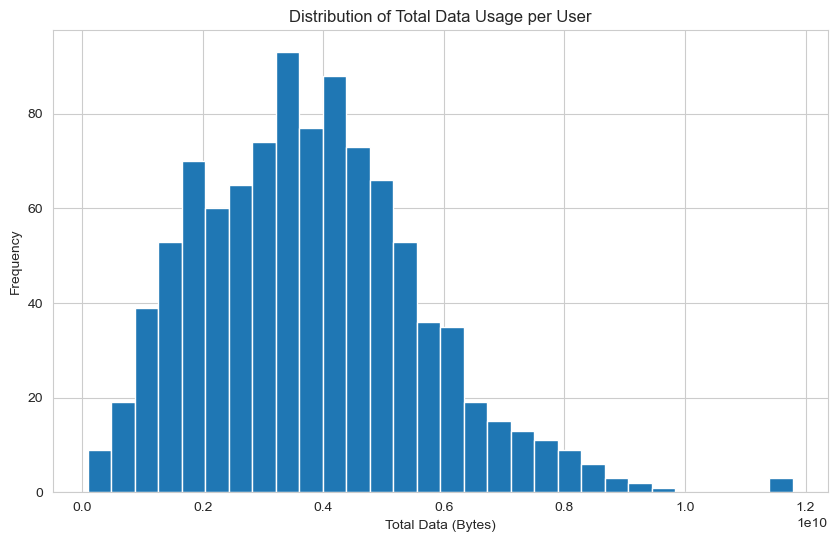

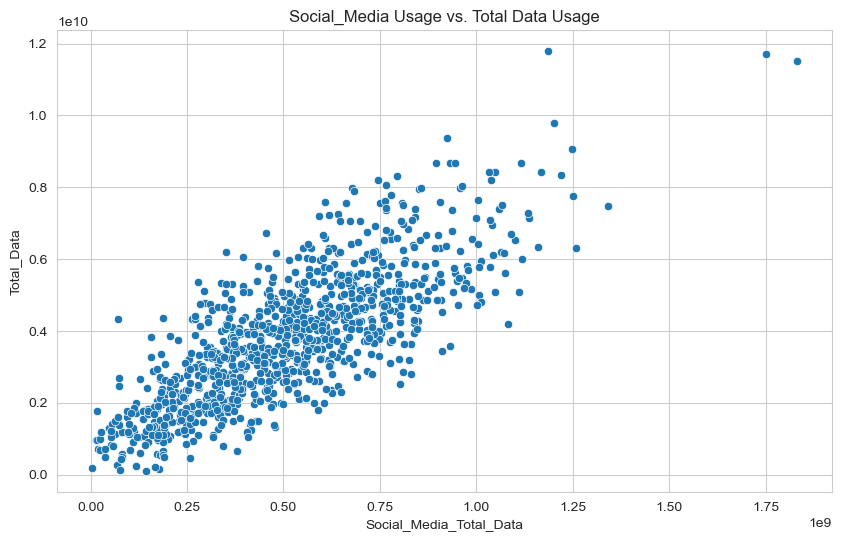

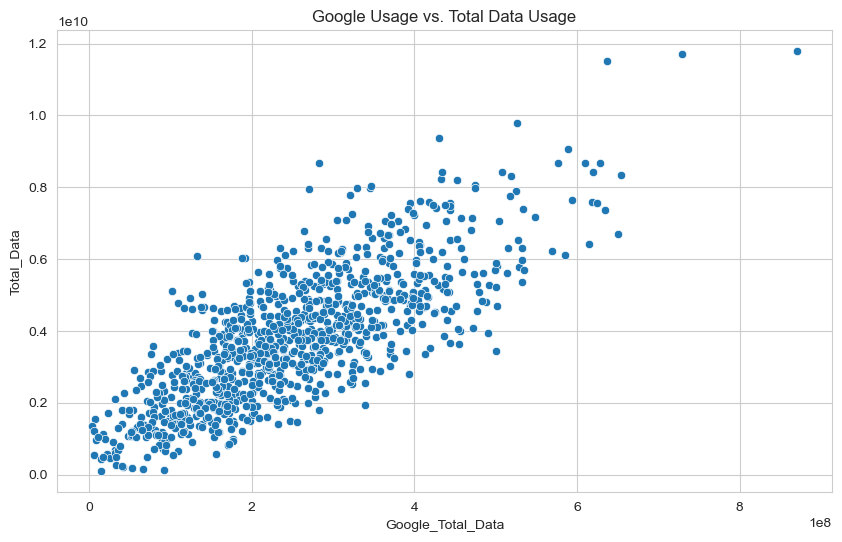

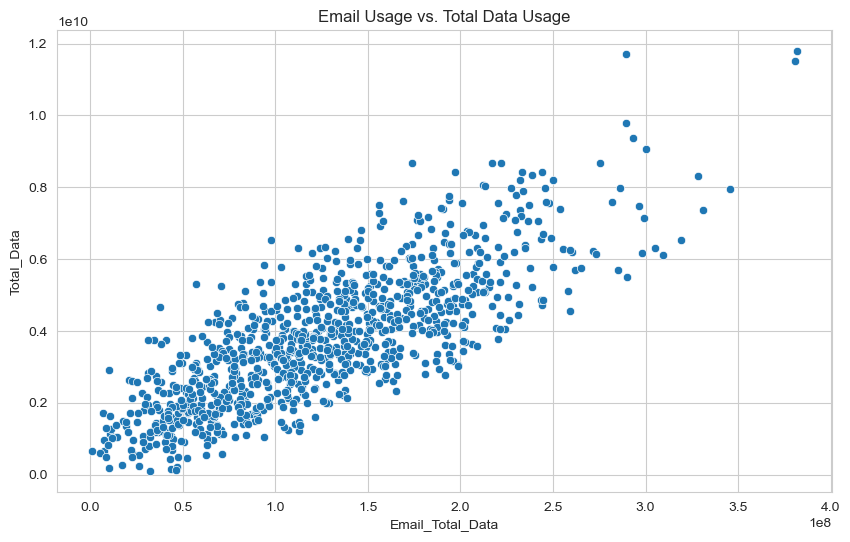

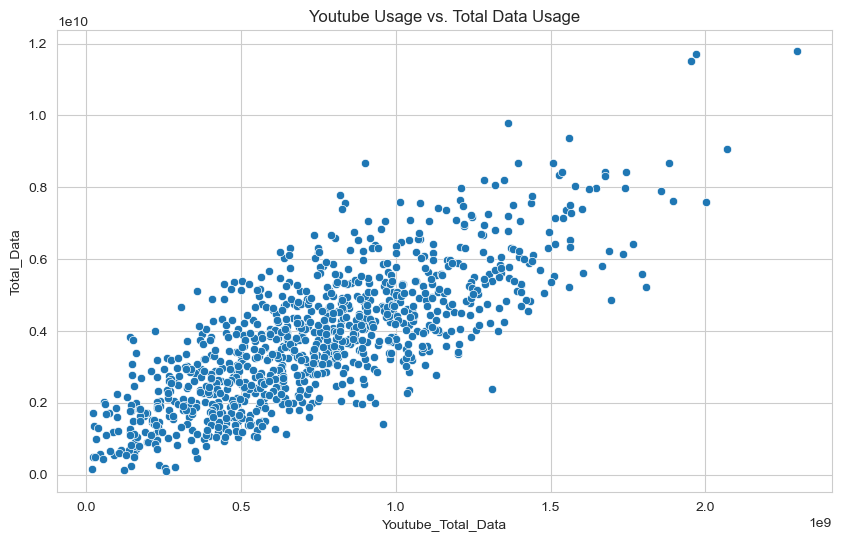

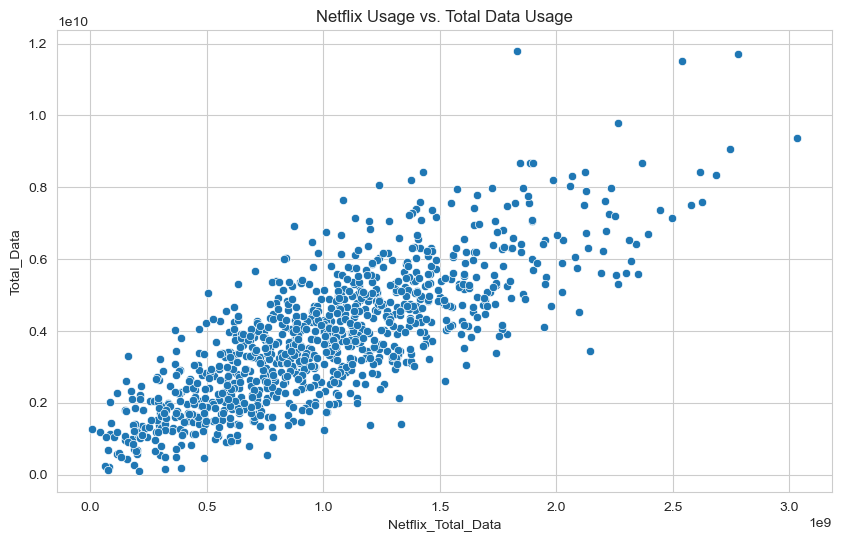

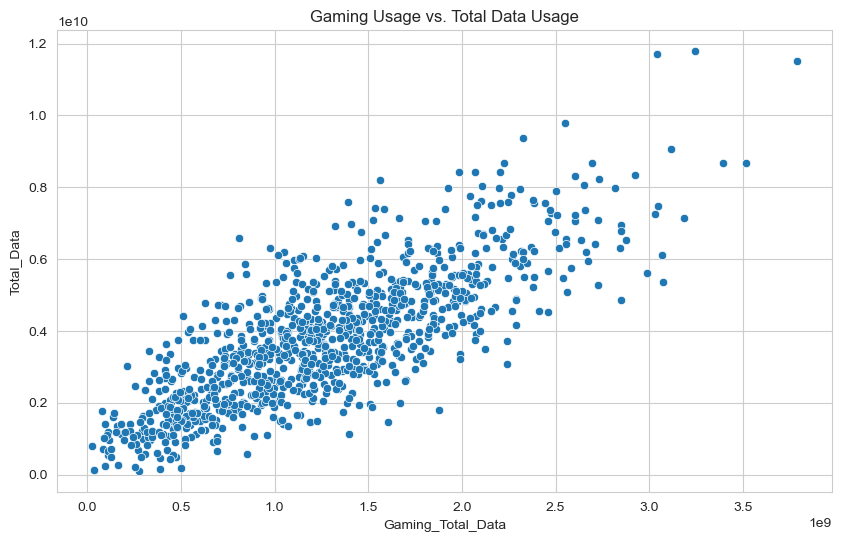

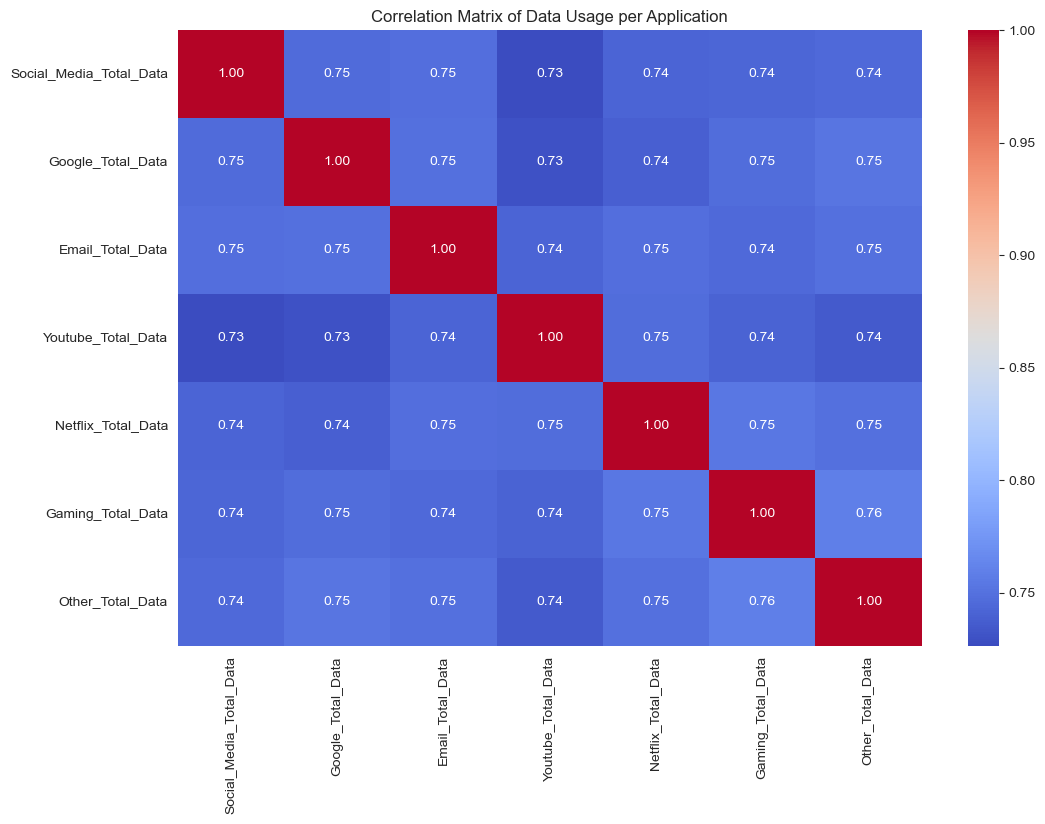


Explained variance ratio by components: [0.78103585 0.04032796]
Interpretation:
 - PC1 and PC2 together explain a significant portion of the variance in app usage.
 - We can use these 2 components to represent user app usage behavior instead of 7 different variables.
 - This helps in simplifying models and visualizations.
 - Users can be plotted on a 2D graph based on their PC1 and PC2 scores to see clusters of behavior.


In [58]:
# [cite_start]1. Handle Missing Values and Outliers [cite: 51]
# For this example, we'll use the original df for experience metrics

# Aggregate per user
user_overview_df = df.groupby('MSISDN').agg(
    Num_Sessions=('MSISDN', 'count'),
    Total_Session_Duration=('Session Duration', 'sum'),
    Total_DL_Data=('DL Data (Bytes)', 'sum'),
    Total_UL_Data=('UL Data (Bytes)', 'sum'),
    Total_Data=('Total Data (Bytes)', 'sum'),
    Social_Media_Total_Data=('Social Media Data', 'sum'),
    Google_Total_Data=('Google Data', 'sum'),
    Email_Total_Data=('Email Data', 'sum'),
    Youtube_Total_Data=('Youtube Data', 'sum'),
    Netflix_Total_Data=('Netflix Data', 'sum'),
    Gaming_Total_Data=('Gaming Data', 'sum'),
    Other_Total_Data=('Other Data', 'sum')
)

print("User Overview Aggregated Data:")
user_overview_df.head()
print("Missing values before handling:")
print(df[['TCP Retransmissions', 'RTT', 'Throughput']].isnull().sum())

# Replace missing values with the mean
for col in ['TCP Retransmissions', 'RTT', 'Throughput']:
    mean_val = df[col].mean()
    df[col] = df[col].fillna(mean_val)

print("\nMissing values after handling:")
print(df[['TCP Retransmissions', 'RTT', 'Throughput']].isnull().sum())


# [cite_start]2. Basic Metrics & Univariate Analysis [cite: 54, 55]
print("\n--- Basic Metrics for User Overview Data ---")
print(user_overview_df.describe())

# [cite_start]3. Graphical Univariate Analysis [cite: 56]
user_overview_df['Total_Data'].plot(kind='hist', bins=30, title='Distribution of Total Data Usage per User')
plt.xlabel("Total Data (Bytes)")
plt.show()

# [cite_start]4. Bivariate Analysis: App vs Total Data [cite: 57]
app_cols = ['Social_Media_Total_Data', 'Google_Total_Data', 'Email_Total_Data', 'Youtube_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data']
for app in app_cols:
    sns.scatterplot(data=user_overview_df, x=app, y='Total_Data')
    plt.title(f'{app.replace("_Total_Data", "")} Usage vs. Total Data Usage')
    plt.show()


# [cite_start]5. Correlation Analysis [cite: 59]
app_data_cols = [col for col in user_overview_df.columns if '_Total_Data' in col]
corr_matrix = user_overview_df[app_data_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Data Usage per Application')
plt.show()

# [cite_start]6. Dimensionality Reduction (PCA) [cite: 60]
pca_data = user_overview_df[app_data_cols]
# We must scale the data before PCA
scaler = StandardScaler()
scaled_pca_data = scaler.fit_transform(pca_data)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_pca_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("\nExplained variance ratio by components:", pca.explained_variance_ratio_)
print("Interpretation:")
print(" - PC1 and PC2 together explain a significant portion of the variance in app usage.")
print(" - We can use these 2 components to represent user app usage behavior instead of 7 different variables.")
print(" - This helps in simplifying models and visualizations.")
print(" - Users can be plotted on a 2D graph based on their PC1 and PC2 scores to see clusters of behavior.")

--- Top 10 Users by Engagement Metrics ---

Top 10 by Number of Sessions:
 MSISDN
MSISDN_195    14
MSISDN_373    14
MSISDN_464    14
MSISDN_254    12
MSISDN_753    12
MSISDN_359    11
MSISDN_420    11
MSISDN_543    11
MSISDN_638    11
MSISDN_896    11
Name: Num_Sessions, dtype: int64

Top 10 by Session Duration:
 MSISDN
MSISDN_373    7880.828302
MSISDN_464    7589.427264
MSISDN_638    7503.897901
MSISDN_543    6965.406819
MSISDN_799    6123.064560
MSISDN_895    5973.482177
MSISDN_333    5797.892512
MSISDN_483    5773.580172
MSISDN_501    5627.258853
MSISDN_767    5592.228041
Name: Total_Session_Duration, dtype: float64

Top 10 by Total Data Usage:
 MSISDN
MSISDN_464    1.178482e+10
MSISDN_195    1.170618e+10
MSISDN_373    1.152170e+10
MSISDN_753    9.801212e+09
MSISDN_256    9.367220e+09
MSISDN_896    9.065258e+09
MSISDN_543    8.686393e+09
MSISDN_799    8.678665e+09
MSISDN_420    8.668625e+09
MSISDN_333    8.663678e+09
Name: Total_Data, dtype: float64

--- Non-Normalized Metrics per E

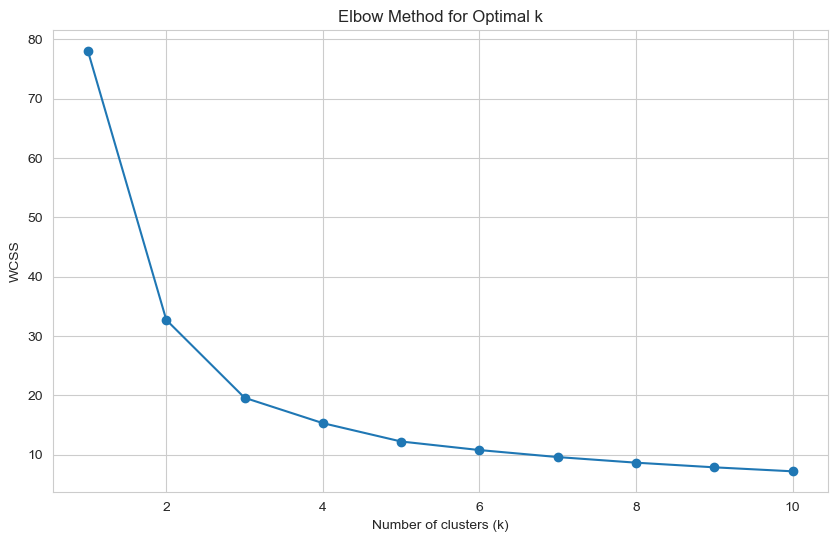

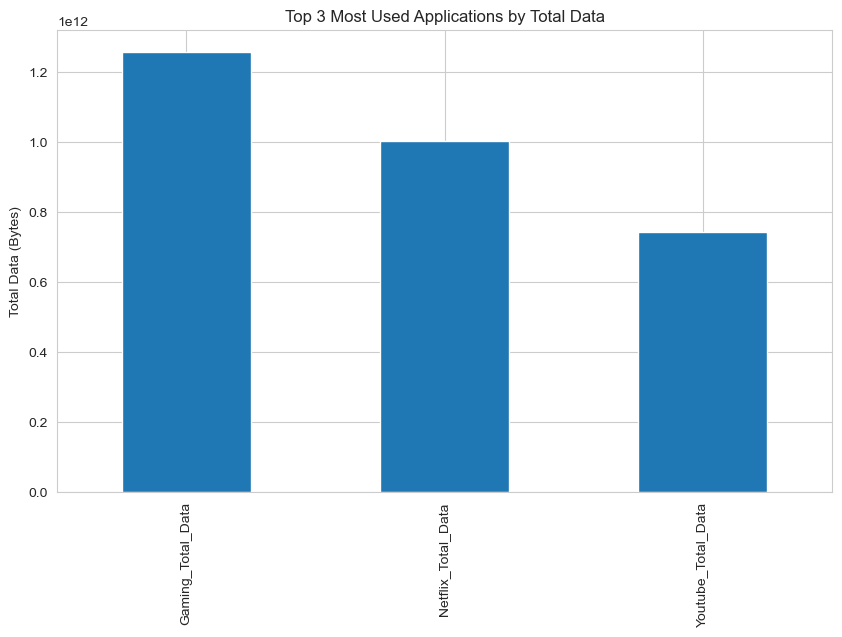

In [59]:
# [cite_start]1. Aggregate engagement metrics [cite: 75]
import os
os.environ['OMP_NUM_THREADS'] = '1'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

user_engagement_df = user_overview_df[['Num_Sessions', 'Total_Session_Duration', 'Total_Data']].copy()

print("--- Top 10 Users by Engagement Metrics ---")
print("\nTop 10 by Number of Sessions:\n", user_engagement_df['Num_Sessions'].nlargest(10))
print("\nTop 10 by Session Duration:\n", user_engagement_df['Total_Session_Duration'].nlargest(10))
print("\nTop 10 by Total Data Usage:\n", user_engagement_df['Total_Data'].nlargest(10))

# [cite_start]2. Normalize and run k-means with k=3 [cite: 76]
scaler = MinMaxScaler()
engagement_scaled = scaler.fit_transform(user_engagement_df)
engagement_scaled_df = pd.DataFrame(engagement_scaled, columns=user_engagement_df.columns, index=user_engagement_df.index)

kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init=10)
user_engagement_df['Engagement Cluster (k=3)'] = kmeans_k3.fit_predict(engagement_scaled_df)

# [cite_start]3. Compute metrics for each cluster [cite: 77]
cluster_summary = user_engagement_df.groupby('Engagement Cluster (k=3)').agg({
    'Num_Sessions': ['min', 'max', 'mean', 'sum'],
    'Total_Session_Duration': ['min', 'max', 'mean', 'sum'],
    'Total_Data': ['min', 'max', 'mean', 'sum']
})
print("\n--- Non-Normalized Metrics per Engagement Cluster (k=3) ---")
print(cluster_summary)

# [cite_start]4. Find optimal k using the Elbow Method [cite: 82]
wcss = [] # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(engagement_scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()
# Let's assume the elbow is at k=4 based on the plot.

# [cite_start]5. Top 3 Most Used Applications [cite: 80]
app_usage = user_overview_df[app_data_cols].sum().sort_values(ascending=False)
top_3_apps = app_usage.nlargest(3)

top_3_apps.plot(kind='bar', title='Top 3 Most Used Applications by Total Data')
plt.ylabel('Total Data (Bytes)')
plt.show()

In [60]:
# [cite_start]1. Aggregate experience data per user [cite: 94]
# We'll use the original dataframe `df` which has per-session data
user_experience_df = df.groupby('MSISDN').agg(
    Avg_TCP_Retrans=('TCP Retransmissions', 'mean'),
    Avg_RTT=('RTT', 'mean'),
    Avg_Throughput=('Throughput', 'mean'),
    Handset_Type=('Handset Model', lambda x: x.mode()[0]) # Most frequent handset
)

print("--- User Experience Aggregated Data ---")
print(user_experience_df.head())

# [cite_start]2. Compute top, bottom, and most frequent values [cite: 100, 101, 102, 103]
print("\n--- TCP Retransmission Analysis ---")
print("Top 10 TCP Values:\n", user_experience_df['Avg_TCP_Retrans'].nlargest(10))
print("\nBottom 10 TCP Values:\n", user_experience_df['Avg_TCP_Retrans'].nsmallest(10))
print("\nMost Frequent TCP Values:\n", user_experience_df['Avg_TCP_Retrans'].value_counts().nlargest(5))

# You can repeat the same for Avg_RTT and Avg_Throughput

--- User Experience Aggregated Data ---
            Avg_TCP_Retrans     Avg_RTT  Avg_Throughput    Handset_Type
MSISDN                                                                 
MSISDN_0          22.887434  279.531869      116.295555      Galaxy S21
MSISDN_1          36.555120  263.243853       90.105922       iPhone SE
MSISDN_10         25.262315  268.498815       91.459893         Mate 40
MSISDN_100        14.095197  396.225761      104.312654  Galaxy Note 20
MSISDN_101        13.287715  354.351047      142.096462       iPhone 13

--- TCP Retransmission Analysis ---
Top 10 TCP Values:
 MSISDN
MSISDN_411    49.238874
MSISDN_429    49.196643
MSISDN_437    48.746858
MSISDN_740    48.068765
MSISDN_726    47.820008
MSISDN_313    45.830255
MSISDN_59     44.757169
MSISDN_628    44.512802
MSISDN_98     44.458063
MSISDN_22     42.901654
Name: Avg_TCP_Retrans, dtype: float64

Bottom 10 TCP Values:
 MSISDN
MSISDN_593    1.416885
MSISDN_246    3.322532
MSISDN_631    4.483814
MSISDN_657    

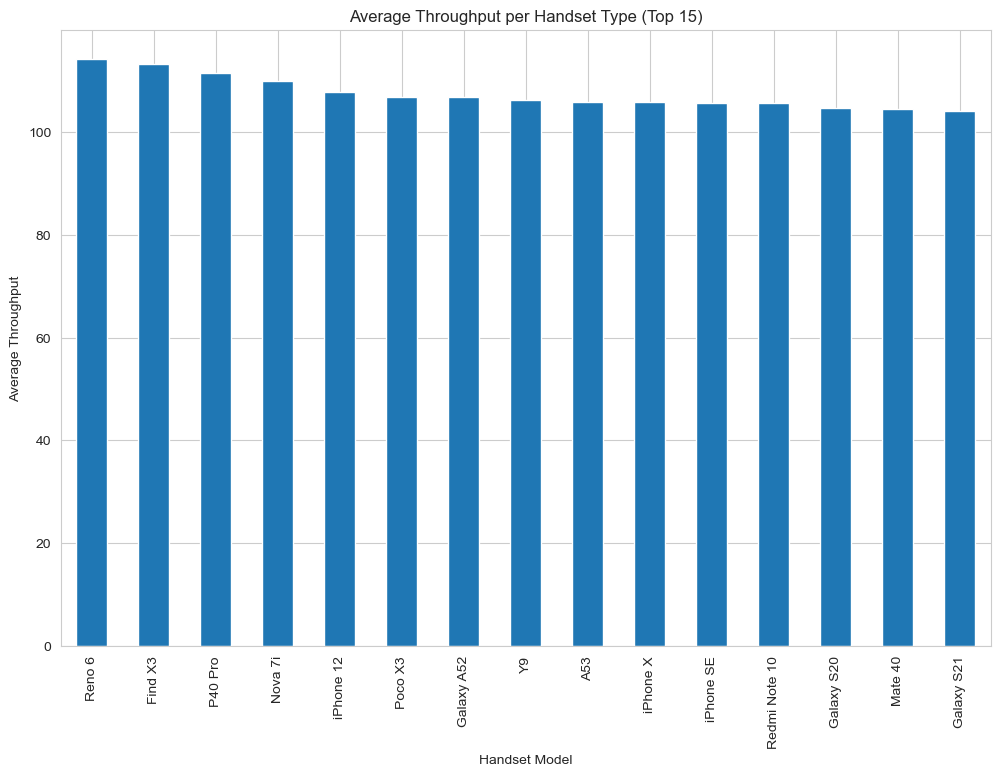


--- Experience Cluster Summary ---
                   Avg_TCP_Retrans     Avg_RTT Avg_Throughput
                              mean        mean           mean
Experience Cluster                                           
0                        23.051828  327.862782      99.602829
1                        31.606807  233.376249      92.766133
2                        21.078450  221.328897     120.657629

Interpretation:
 - One cluster likely represents the 'worst experience' (high TCP/RTT, low throughput).
 - Another cluster represents the 'best experience' (low TCP/RTT, high throughput).
 - The third cluster is likely an average or medium experience group.


In [61]:
# [cite_start]1. Throughput per Handset Type [cite: 105]
handset_experience_df = df.groupby('Handset Model').agg(
    Avg_Throughput=('Throughput', 'mean'),
    Avg_TCP_Retrans=('TCP Retransmissions', 'mean')
).sort_values(by='Avg_Throughput', ascending=False)

plt.figure(figsize=(12, 8))
handset_experience_df['Avg_Throughput'].nlargest(15).plot(kind='bar')
plt.title('Average Throughput per Handset Type (Top 15)')
plt.ylabel('Average Throughput')
plt.show()

# [cite_start]2. Experience Clustering (k=3) [cite: 107]
experience_metrics = user_experience_df[['Avg_TCP_Retrans', 'Avg_RTT', 'Avg_Throughput']]
scaler = StandardScaler()
experience_scaled = scaler.fit_transform(experience_metrics)

kmeans_exp = KMeans(n_clusters=3, random_state=42, n_init=10)
user_experience_df['Experience Cluster'] = kmeans_exp.fit_predict(experience_scaled)

exp_cluster_summary = user_experience_df.groupby('Experience Cluster').agg({
    'Avg_TCP_Retrans': ['mean'],
    'Avg_RTT': ['mean'],
    'Avg_Throughput': ['mean']
})
print("\n--- Experience Cluster Summary ---")
print(exp_cluster_summary)
print("\nInterpretation:")
print(" - One cluster likely represents the 'worst experience' (high TCP/RTT, low throughput).")
print(" - Another cluster represents the 'best experience' (low TCP/RTT, high throughput).")
print(" - The third cluster is likely an average or medium experience group.")


--- Top 10 Most Satisfied Customers ---
            Satisfaction Score
MSISDN                        
MSISDN_437            3.024554
MSISDN_9              2.714204
MSISDN_631            2.528258
MSISDN_849            2.526939
MSISDN_261            2.396546
MSISDN_628            2.302844
MSISDN_236            2.278331
MSISDN_92             2.221979
MSISDN_59             2.209525
MSISDN_439            2.150073

RMSE of Satisfaction Score Prediction Model: 0.2929


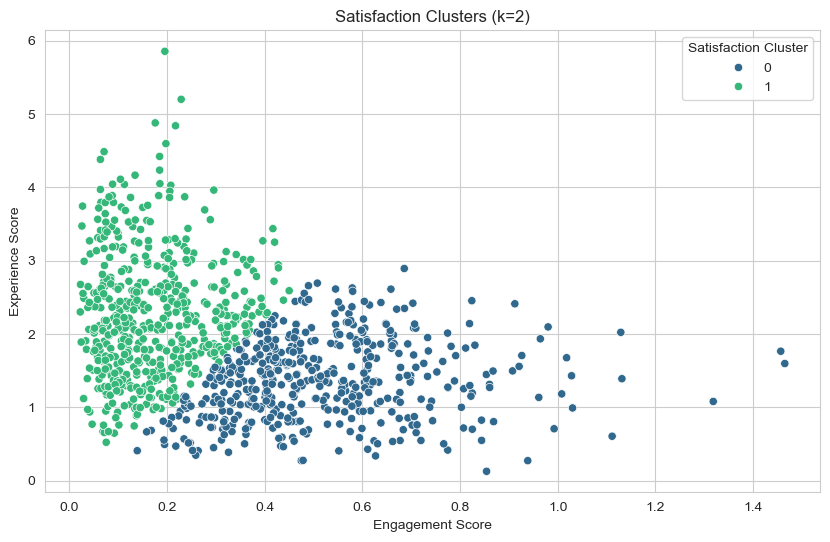


Data successfully exported to 'customer_satisfaction_scores.csv'

--- Screenshot this output below ---
       MSISDN  Engagement Score  Experience Score  Satisfaction Score
0    MSISDN_0          0.458613          0.925205            0.691909
1    MSISDN_1          0.129807          2.149218            1.139512
2   MSISDN_10          0.616755          0.954303            0.785529
3  MSISDN_100          0.142932          1.609700            0.876316
4  MSISDN_101          0.107813          2.117132            1.112473
5  MSISDN_102          0.367194          0.791028            0.579111
6  MSISDN_103          0.148874          1.914480            1.031677
7  MSISDN_104          0.316869          2.334836            1.325853
8  MSISDN_105          0.698901          1.433743            1.066322
9  MSISDN_106          0.279557          1.317144            0.798350


In [62]:
# [cite_start]1. Find the worst clusters [cite: 113, 114]
# Worst engagement cluster (let's assume it's the one with lowest total data)
worst_eng_cluster_id = user_engagement_df.groupby('Engagement Cluster (k=3)')['Total_Data'].mean().idxmin()
eng_centroid = kmeans_k3.cluster_centers_[worst_eng_cluster_id]

# Worst experience cluster (let's assume it has highest RTT)
worst_exp_cluster_id = user_experience_df.groupby('Experience Cluster')['Avg_RTT'].mean().idxmax()
exp_centroid = kmeans_exp.cluster_centers_[worst_exp_cluster_id]

# [cite_start]2. Calculate Engagement and Experience Scores [cite: 113, 114]
# Engagement Score (distance from worst cluster)
user_engagement_df['Engagement Score'] = np.linalg.norm(engagement_scaled_df.values - eng_centroid, axis=1)

# Experience Score (distance from worst cluster)
user_experience_df['Experience Score'] = np.linalg.norm(experience_scaled - exp_centroid, axis=1)

# 3. Combine into a final dataframe
final_df = pd.concat([user_engagement_df, user_experience_df], axis=1)
final_df.dropna(inplace=True) # Drop users that might not be in both datasets

# [cite_start]4. Calculate Satisfaction Score and report top 10 [cite: 115]
final_df['Satisfaction Score'] = (final_df['Engagement Score'] + final_df['Experience Score']) / 2
print("\n--- Top 10 Most Satisfied Customers ---")
print(final_df[['Satisfaction Score']].nlargest(10, 'Satisfaction Score'))

# [cite_start]5. Build a regression model to predict satisfaction [cite: 116]
features = ['Num_Sessions', 'Total_Session_Duration', 'Total_Data', 'Avg_TCP_Retrans', 'Avg_RTT', 'Avg_Throughput']
target = 'Satisfaction Score'

X = final_df[features]
y = final_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"\nRMSE of Satisfaction Score Prediction Model: {rmse:.4f}")

# [cite_start]6. K-means (k=2) on engagement & experience scores [cite: 117]
scores_df = final_df[['Engagement Score', 'Experience Score']]
scaler = MinMaxScaler()
scores_scaled = scaler.fit_transform(scores_df)

kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
final_df['Satisfaction Cluster'] = kmeans_final.fit_predict(scores_scaled)

sns.scatterplot(data=final_df, x='Engagement Score', y='Experience Score', hue='Satisfaction Cluster', palette='viridis')
plt.title('Satisfaction Clusters (k=2)')
plt.show()

# --- ADD THIS CODE TO EXPORT THE CSV FILE ---

# 1. Prepare the final DataFrame for export
final_df_to_export = final_df[['Engagement Score', 'Experience Score', 'Satisfaction Score']].reset_index()
final_df_to_export.rename(columns={'index': 'MSISDN'}, inplace=True)

# 2. Define the output filename
output_csv_path = 'customer_satisfaction_scores.csv'

# 3. Export the DataFrame to the CSV file
final_df_to_export.to_csv(output_csv_path, index=False)

print(f"\nData successfully exported to '{output_csv_path}'")

# 4. Generate the required screenshot
print("\n--- Screenshot this output below ---")
exported_data = pd.read_csv(output_csv_path)
print(exported_data.head(10))

In [63]:
# Add this code to your Jupyter Notebook for Task 4.7

import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Set the experiment name
mlflow.set_experiment("TellCo_Satisfaction_Prediction")

# The data X and y should already be defined from your previous steps
# X = final_df[features]
# y = final_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This block will now automatically track your model run
with mlflow.start_run():
    # Log parameters
    mlflow.log_param("test_size", 0.2)
    mlflow.log_param("model_type", "LinearRegression")
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    # Log the metric
    mlflow.log_metric("rmse", rmse)
    
    # Log the model itself as an artifact
    mlflow.sklearn.log_model(model, "satisfaction_model")
    
    print(f"\nRMSE of Satisfaction Score Prediction Model: {rmse:.4f}")
    print("\n✅ Model run successfully logged to MLflow.")
    print("Run 'mlflow ui' in your terminal to see the results.")

ModuleNotFoundError: No module named 'mlflow'

In [ ]:
print("\n--- Top 10 Most Satisfied Customers ---")
display(final_df[['Satisfaction Score']].nlargest(10, 'Satisfaction Score'))

print(f"\nRMSE of Satisfaction Score Prediction Model: {rmse:.4f}")

print("\n--- Satisfaction Clusters (k=2) ---")
sns.scatterplot(data=final_df, x='Engagement Score', y='Experience Score', hue='Satisfaction Cluster', palette='viridis')
plt.title('Satisfaction Clusters (k=2)')
plt.show()